### Computer Vision and Convolutional Neural Networks in Tensorflow

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-06-16 12:32:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.166.251, 172.217.166.27, 172.217.27.187, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.166.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  12.7MB/s    in 8.8s    

2024-06-16 12:33:02 (11.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls ../datasets/pizza_steak/

test  train


In [3]:
!ls ../datasets/pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

for dirpath, dirnames, filenames in os.walk('../datasets/pizza_steak'):
    print(f"There are { len(dirnames) } directories and { len(filenames) } images in '{ dirpath }'")

There are 2 directories and 0 images in '../datasets/pizza_steak'
There are 2 directories and 0 images in '../datasets/pizza_steak/test'
There are 0 directories and 250 images in '../datasets/pizza_steak/test/steak'
There are 0 directories and 250 images in '../datasets/pizza_steak/test/pizza'
There are 2 directories and 0 images in '../datasets/pizza_steak/train'
There are 0 directories and 750 images in '../datasets/pizza_steak/train/steak'
There are 0 directories and 750 images in '../datasets/pizza_steak/train/pizza'


In [5]:
# Another way to find the nunmber of files
len(os.listdir('../datasets/pizza_steak/train/steak'))

750

In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

[]


SHAPE: (512, 288, 3)


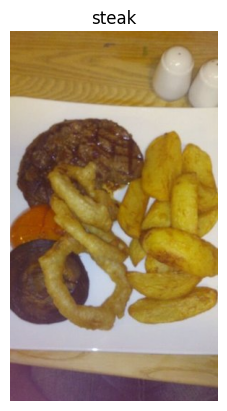

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #setup the target directory
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"SHAPE: {img.shape}")
    
    return img

img = view_random_image(target_dir="../datasets/pizza_steak/train/", target_class="steak")



In [13]:
import tensorflow as tf

tf.constant(img)

2024-06-16 20:44:18.132560: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 20:44:18.132672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 20:44:18.224203: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-16 20:44:18.412472: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 20:44:20.477995: W tensorflow/compiler/tf2

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 69,  80,  86],
        [ 63,  74,  78],
        [ 63,  68,  74],
        ...,
        [ 12,  18,  18],
        [  4,  19,  14],
        [  5,  22,  14]],

       [[ 16,  91,  84],
        [ 23,  85,  80],
        [ 43,  77,  79],
        ...,
        [  6,  14,  16],
        [  3,  15,  13],
        [  4,  19,  14]],

       [[ 44,  71,  88],
        [ 46,  72,  87],
        [ 55,  71,  84],
        ...,
        [  4,  15,  19],
        [  4,  14,  16],
        [  7,  15,  17]],

       ...,

       [[245, 239, 241],
        [247, 236, 240],
        [247, 235, 239],
        ...,
        [225, 223, 228],
        [223, 222, 227],
        [222, 223, 228]],

       [[243, 239, 240],
        [245, 236, 239],
        [247, 235, 239],
        ...,
        [225, 223, 228],
        [224, 221, 230],
        [222, 222, 230]],

       [[240, 238, 239],
        [243, 237, 239],
        [247, 236, 240],
        ...,
        [227, 222, 22

In [14]:
img.shape

(384, 512, 3)

In [15]:
img = img/255.

### Normalizing image

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "../datasets/pizza_steak/train"
test_dir = "../datasets/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                               )

# Build a CNN model(same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2024-06-16 21:28:09.994612: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-06-16 21:28:13.985588: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f00e879f2a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-16 21:28:13.985659: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2024-06-16 21:28:14.012454: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718553494.218497   10707 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


47/47 [==============================] - 25s 290ms/step - loss: 0.5753 - accuracy: 0.6820 - val_loss: 0.3732 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 9s 181ms/step - loss: 0.4262 - accuracy: 0.8027 - val_loss: 0.3245 - val_accuracy: 0.8800
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.3804 - accuracy: 0.8373 - val_loss: 0.3340 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.3383 - accuracy: 0.8613 - val_loss: 0.3489 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.2953 - accuracy: 0.8847 - val_loss: 0.3467 - val_accuracy: 0.8560


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### Using the same model as before

In [21]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 171ms/step - loss: 0.9662 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 162ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000


SHAPE: (384, 512, 3)
SHAPE: (512, 382, 3)


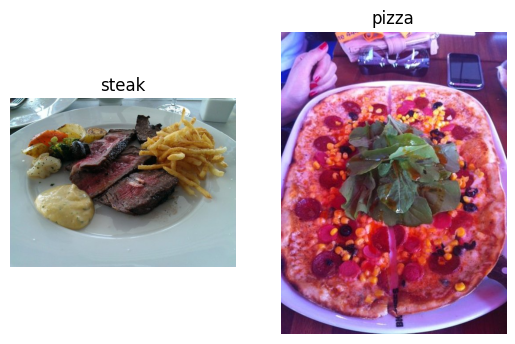

In [28]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(view_random_image(target_dir="../datasets/pizza_steak/train/", target_class="steak"))
plt.subplot(1, 2, 2)
plt.imshow(view_random_image(target_dir="../datasets/pizza_steak/train/", target_class="pizza"))

In [33]:
train_dir = "../datasets/pizza_steak/train/"
test_dir = "../datasets/pizza_steak/test/"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode="binary", batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224), class_mode="binary", batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [34]:
images, labels = train_data.next()
len(images), len(labels)

(33, 33)